In [11]:
# if library is not installed, use this
# pip install colorthief
# !pip install easydev                 #version 0.12.0
# !pip install colormap                #version 1.0.4
# !pip install opencv-python           #version 4.5.5.64
# !pip install colorgram.py            #version 1.2.0
# !pip install extcolors               #version 1.0.0
#!pip install mayavi

In [9]:
#numpy and pandas
import numpy as np
from numpy import asarray
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# image processing tool
from glob import glob
import cv2
import extcolors
from colormap import rgb2hex
from PIL import Image
import imageio

# other tools
from sklearn.metrics import mutual_info_score
import seaborn as sns

In [10]:
# load the image
image1 = Image.open('final_data/shot_eggblue_marilyn_1964-19604.png')
image2 = Image.open('final_data/shot_blue_marilyn_1964-19604.jpg')
image3 = Image.open('final_data/shot_red_marilyn_1964-19604.png')
image4 = Image.open("final_data/shot_orange_marilyn_1964-19604.png")
image5 = Image.open("final_data/shot_turq_marilyn_1964-19604.png")

# convert image2 from jpg into png
image2 = image2.convert('RGBA')
image2.save('final_data/blue.png', 'PNG')

image_url = ['final_data/shot_eggblue_marilyn_1964-19604.png',
             'final_data/blue.png',
             'final_data/shot_red_marilyn_1964-19604.png',
             'final_data/shot_orange_marilyn_1964-19604.png',
            'final_data/shot_turq_marilyn_1964-19604.png']
images = [image1,image2,image3,image4,image5]

In [12]:
# for each image, create Pillow image, and store image data
data_image=[]
for image in images:
    # convert image to numpy array
    data = asarray(image)
    data_image.append(data)
    print(type(data))
    # summarize shape
    print(data.shape)

    # create Pillow image
    image_pillow = Image.fromarray(data)
    print(type(image_pillow))

    # summarize image details
    print(image_pillow.mode)
    print(image_pillow.size)
    print('------------------')

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------


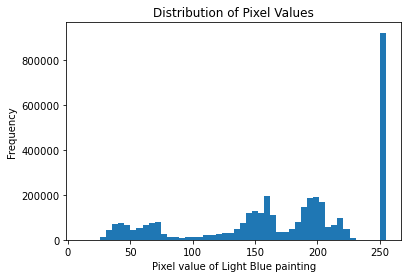

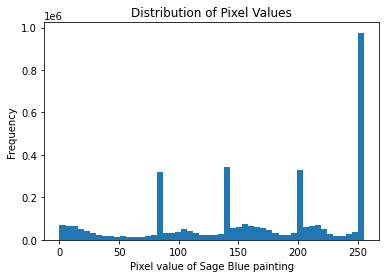

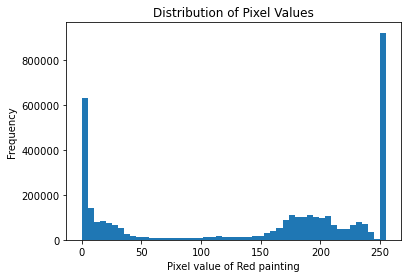

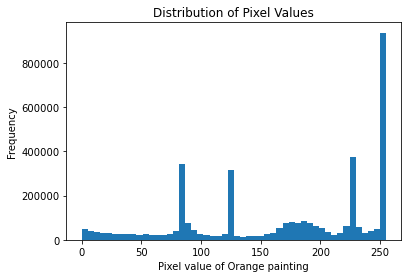

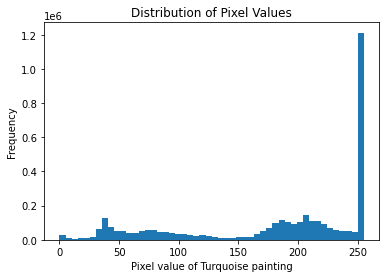

In [13]:
# distribution of pixel values for each image
image_name = ['Light Blue','Sage Blue','Red','Orange','Turquoise']
for data,col_name in zip(data_image,image_name):
    pd.Series(data.flatten()).plot(kind='hist',bins=50,title='Distribution of Pixel Values')
    plt.xlabel("Pixel value of {} painting".format(col_name))
    plt.show()

In [18]:
# This block of code referenced from 
# https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e 


def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

def exact_color(img, img_url, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    
    #crate dataframe
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(img_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

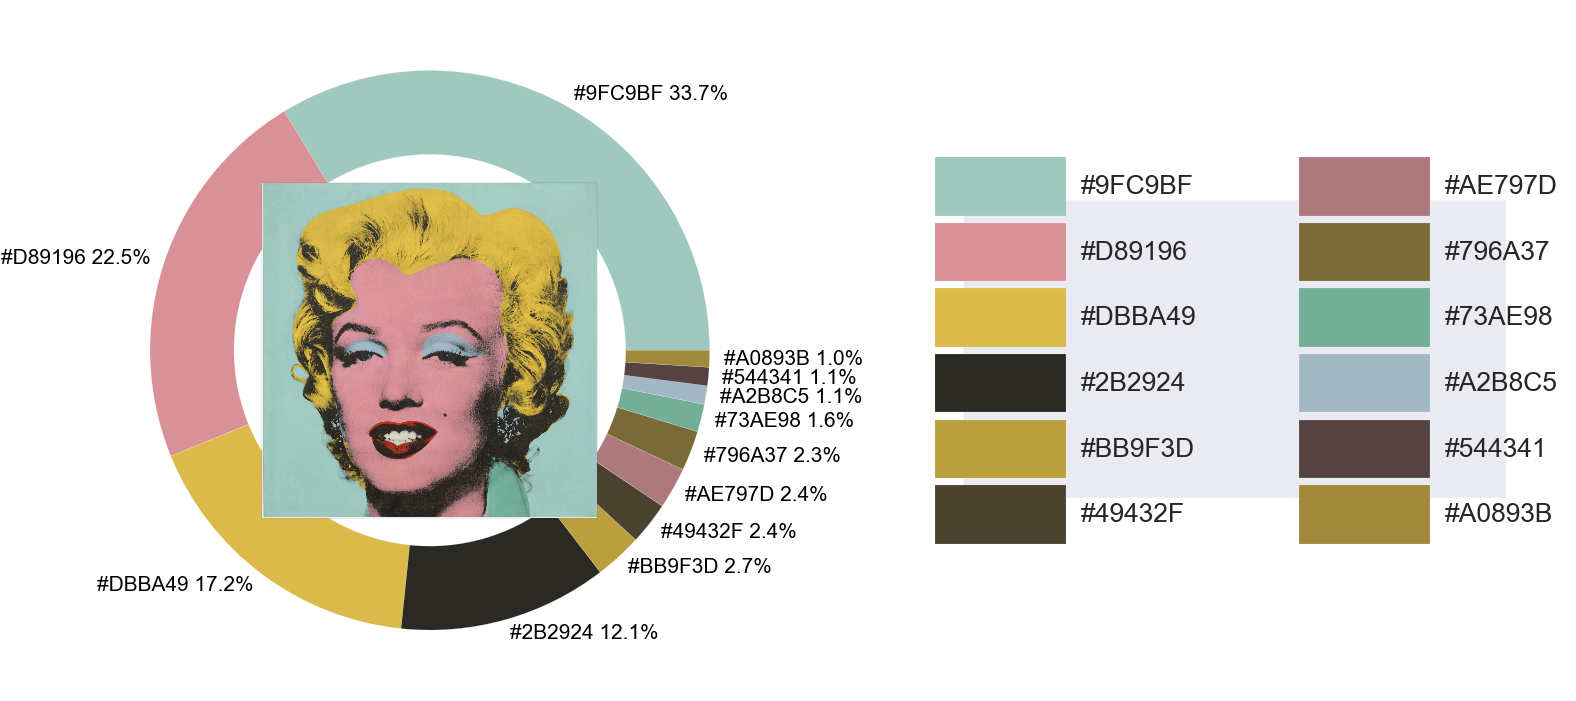

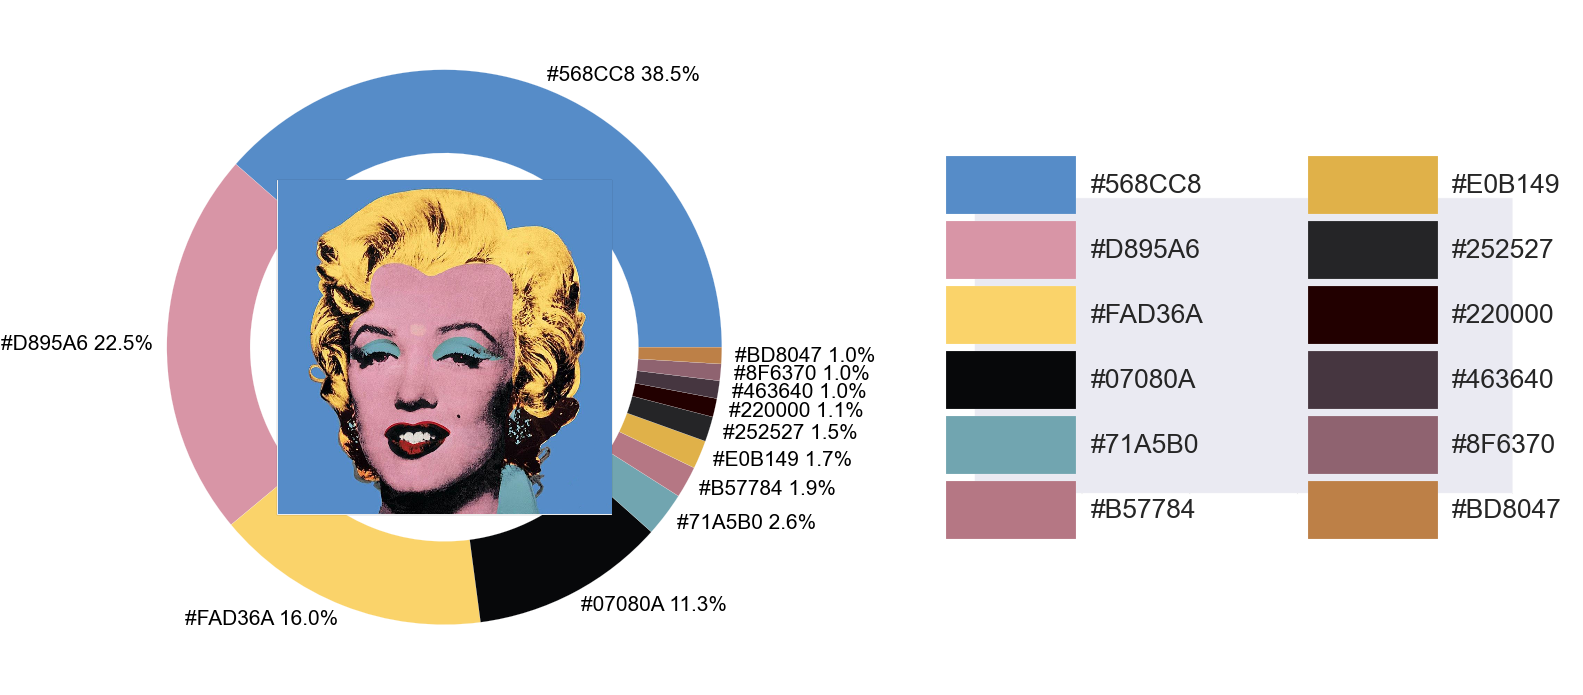

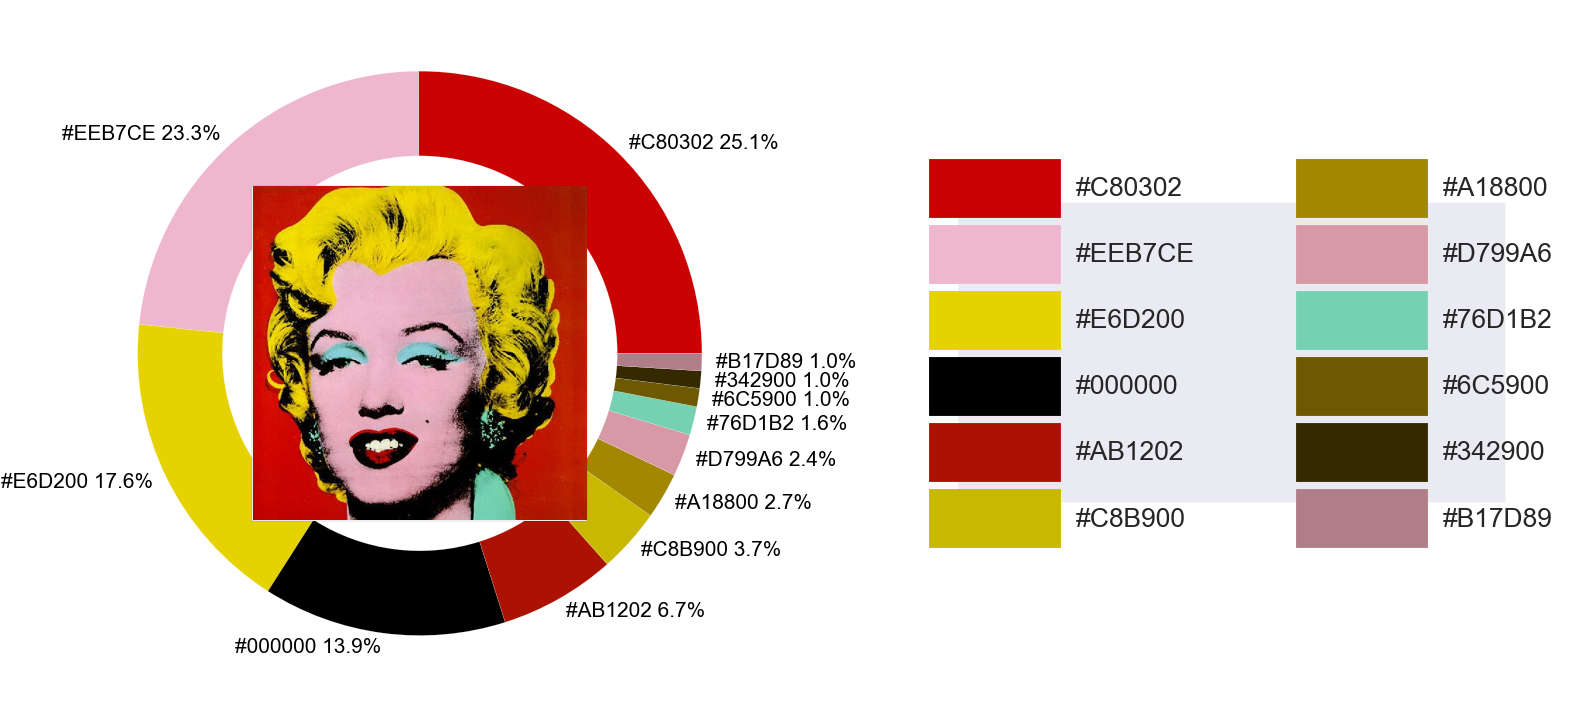

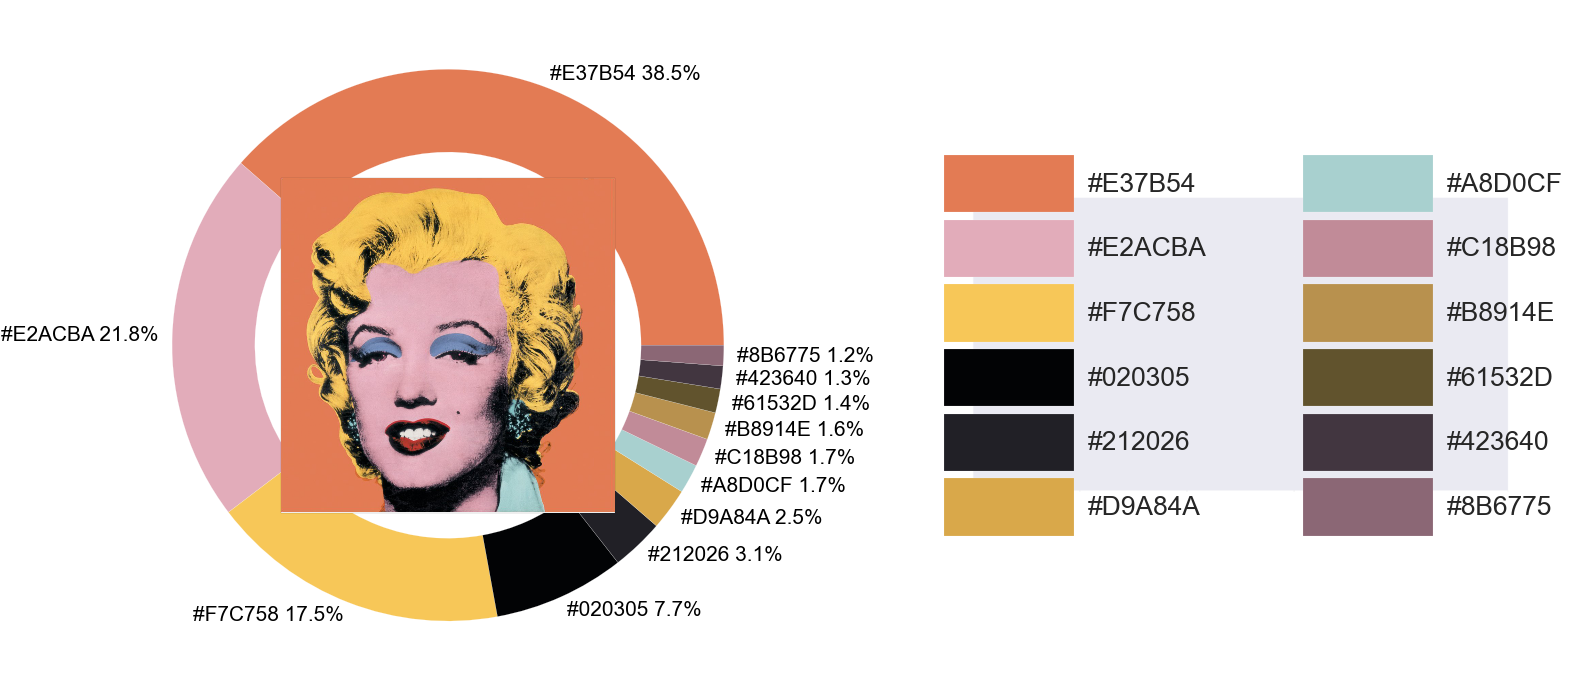

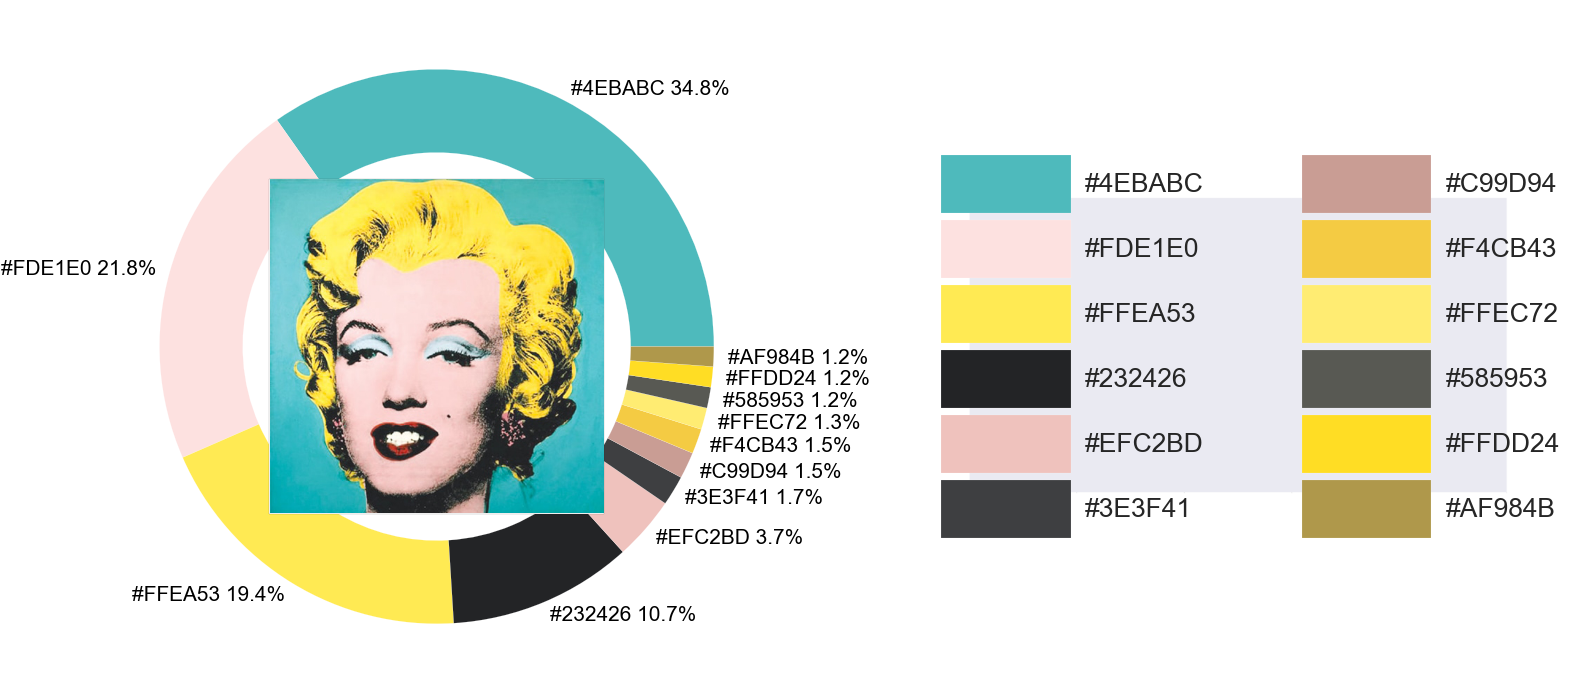

In [19]:
# plot color extraction result for each images used function above
for image,imageUrl in zip(images,image_url):
    exact_color(image, imageUrl, 12, 2.5)

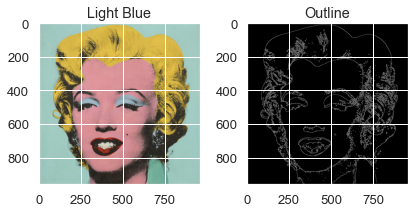

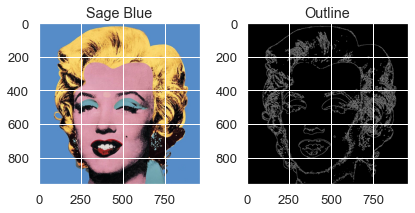

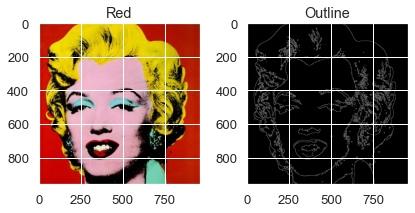

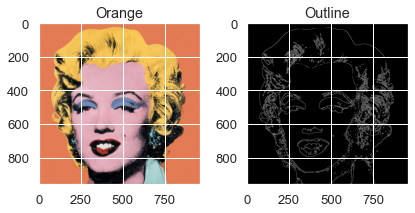

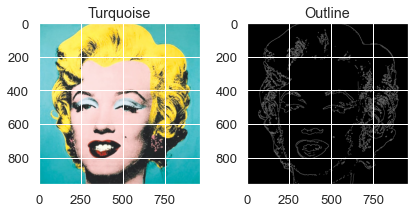

In [20]:
# Image outlines
for img_url,imageName in zip(image_url,image_name):
    img = cv2.imread(img_url)
    # adjust threshold here for different edge detection effect, lower value = more lines
    edges = cv2.Canny(img,200,250,L2gradient=False)

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(imageName)

    # Display edges image
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Outline')

    plt.tight_layout()
    plt.show()

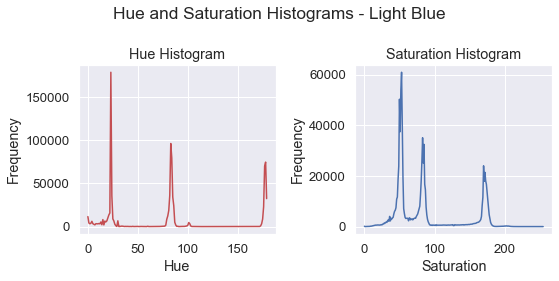

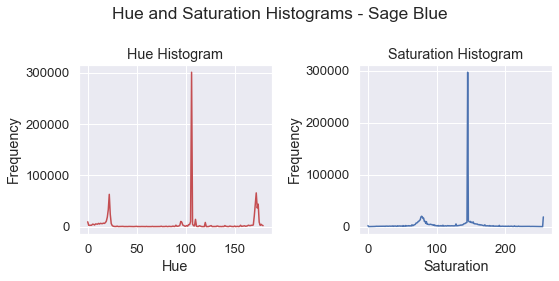

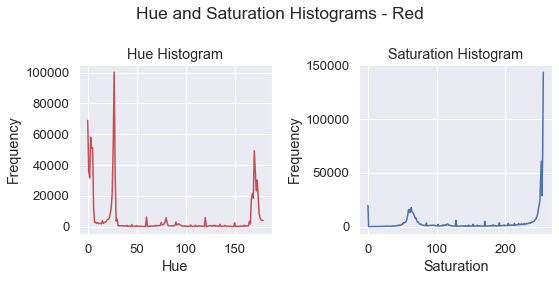

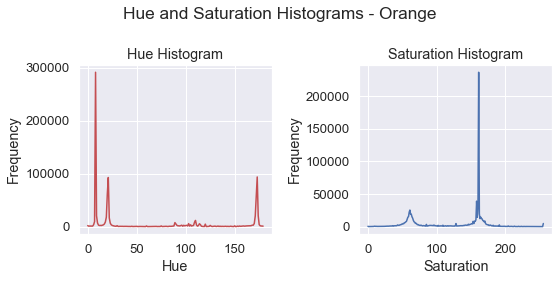

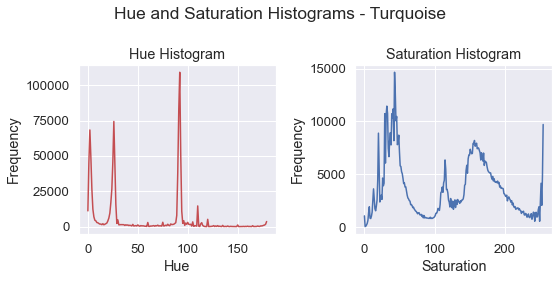

In [21]:


def analyze_hue_saturation(image_url):
    # Read the image
    img = cv2.imread(image_url)
    
    # Convert BGR to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Split the channels
    h, s, v = cv2.split(hsv_img)
    
    # Compute histogram of hue and saturation channels
    hue_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
    saturation_hist = cv2.calcHist([hsv_img], [1], None, [256], [0, 256])
    
    return h, s, hue_hist, saturation_hist


# List to store the results
results = []

# Analyze hue/saturation and compute histograms for each image
for image_path in image_url:
    h, s, hue_hist, saturation_hist = analyze_hue_saturation(image_path)
    
    # Store the results in a dictionary
    result = {
        "image_path": image_path,
        "h": h,
        "s": s,
        "hue_hist": hue_hist,
        "saturation_hist": saturation_hist
    }
    
    results.append(result)

# Plot the histograms of hue and saturation for each image
for result, imageName in zip(results,image_name):
    image_path = result["image_path"]
    hue_hist = result["hue_hist"]
    saturation_hist = result["saturation_hist"]
    
    # Plot the hue histogram
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hue_hist, color='r')
    plt.title("Hue Histogram")
    plt.xlabel("Hue")
    plt.ylabel("Frequency")
    
    # Plot the saturation histogram
    plt.subplot(1, 2, 2)
    plt.plot(saturation_hist, color='b')
    plt.title("Saturation Histogram")
    plt.xlabel("Saturation")
    plt.ylabel("Frequency")
    
    plt.suptitle(f"Hue and Saturation Histograms - {imageName}")
    plt.tight_layout()
    plt.show()


Below are plots created following graphs in the Geometry of Color.

distribution of rgb values for each images in ratio

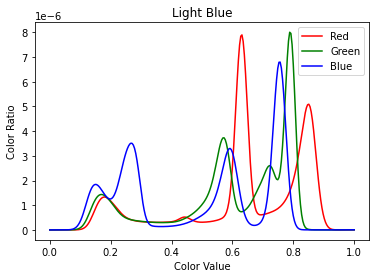

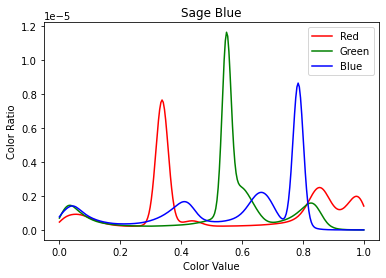

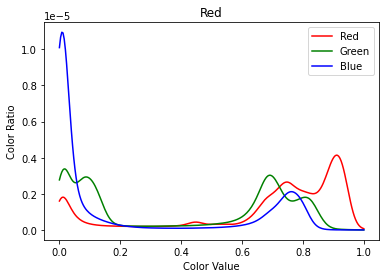

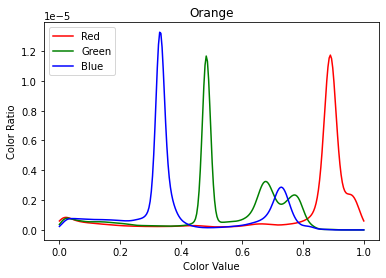

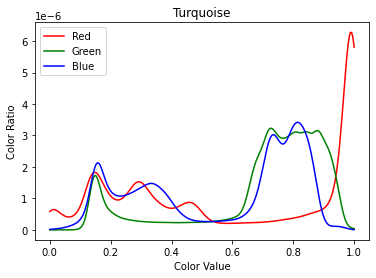

In [30]:
from scipy.stats import gaussian_kde

def plot_color_distributions(image, title):
    # Split the image into color channels
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()

    # Calculate the color ratios
    height, width, channels = image.shape

    # Calculate the total number of pixels
    total_pixels = height * width
    red_ratio = red_channel / 255
    green_ratio = green_channel / 255
    blue_ratio = blue_channel / 255

    # Create a continuous range for x-axis
    x_range = np.linspace(0, 1, num=256)

    # Compute the color distributions using kernel density estimation
    red_distribution = gaussian_kde(red_ratio).evaluate(x_range)
    green_distribution = gaussian_kde(green_ratio).evaluate(x_range)
    blue_distribution = gaussian_kde(blue_ratio).evaluate(x_range)

    # Normalize the distributions to get ratios
    red_distribution = red_distribution / total_pixels
    green_distribution = green_distribution / total_pixels
    blue_distribution = blue_distribution / total_pixels

    # Plot the color distributions as smooth curves
    plt.plot(x_range, red_distribution, color='red', label='Red')
    plt.plot(x_range, green_distribution, color='green', label='Green')
    plt.plot(x_range, blue_distribution, color='blue', label='Blue')
    plt.xlabel('Color Value')
    plt.ylabel('Color Ratio')
    plt.title(title)
    plt.legend()
    plt.show()

# Process the images
for imageName, image_data in zip(image_name, data_image):
    # Plot the color distributions
    plot_color_distributions(image_data, imageName)


Relative conditional entropy plot for images

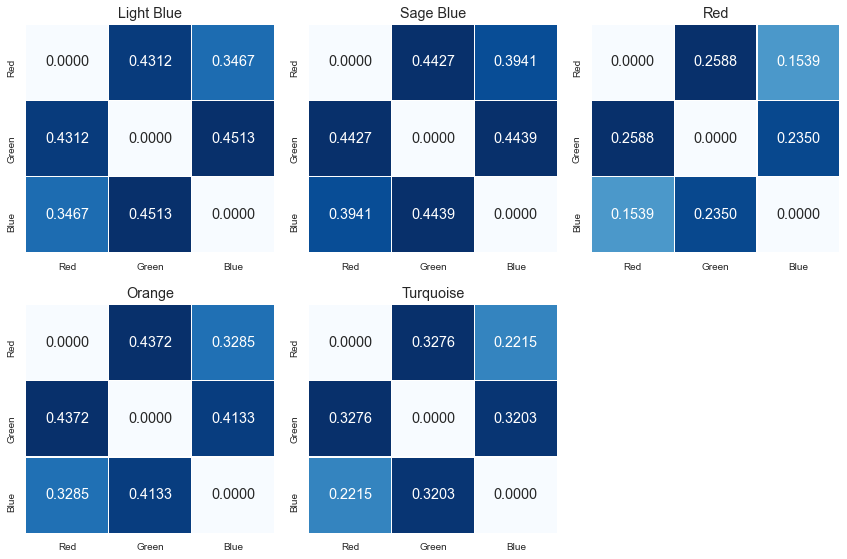

In [23]:
# Calculate the relative conditional entropy
def calculate_relative_conditional_entropy(image):
    # Split the image into color channels
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()

    # Calculate the relative conditional entropy
    red_green_entropy = mutual_info_score(red_channel, green_channel) / mutual_info_score(green_channel, green_channel)
    red_blue_entropy = mutual_info_score(red_channel, blue_channel) / mutual_info_score(blue_channel, blue_channel)
    green_blue_entropy = mutual_info_score(green_channel, blue_channel) / mutual_info_score(blue_channel, blue_channel)

    return red_green_entropy, red_blue_entropy, green_blue_entropy

# Create subplots for each image
num_rows = 2
num_cols = (len(image_url) + 1) // num_rows  # Adjust the number of columns based on the number of images
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Generate the 3x3 tables for each image
for imageName, imgData, ax in zip(image_name, data_image, axes.flat):
    # Calculate the relative conditional entropy values
    red_green_entropy, red_blue_entropy, green_blue_entropy = calculate_relative_conditional_entropy(imgData)

    # Create a DataFrame for the table
    table_data = np.array([[0, red_green_entropy, red_blue_entropy],
                           [red_green_entropy, 0, green_blue_entropy],
                           [red_blue_entropy, green_blue_entropy, 0]])

    # Create a heatmap table using seaborn
    df = pd.DataFrame(table_data, columns=['Red', 'Green', 'Blue'], index=['Red', 'Green', 'Blue'])
    sns.set(font_scale=1.2)
    sns.heatmap(df, annot=True, fmt=".4f", cmap='Blues', cbar=False, linewidths=0.5, ax=ax)

    # Set the plot title and axis labels
    ax.set_title(imageName)
    ax.tick_params(axis='both', labelsize=10)

# Remove empty subplots
if len(image_url) < num_rows * num_cols:
    for ax in axes.flat[len(image_url):]:
        ax.axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()



three ROI for my code: ROI: region of interest in the image, which we focus on the hair color, eye shadow color, and background color

In [16]:
Rmin = np.min(data_image[0][:, :, 0])
Gmin = np.min(data_image[0][:, :, 1])
Bmin = np.min(data_image[0][:, :, 2])

Rmax = np.max(data_image[0][:, :, 0])
Gmax = np.max(data_image[0][:, :, 1])
Bmax = np.max(data_image[0][:, :, 2])

lower_threshold = np.array([Rmin, Gmin, Bmin])
upper_threshold = np.array([Rmax, Gmax, Bmax])
upper_threshold
lower_threshold


array([16, 11, 11], dtype=uint8)

In [18]:
import cv2
import numpy as np

def extract_background(image):
    # Convert the image to the grayscale color space
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply morphological operations to enhance the background regions
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    opened = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

    # Perform adaptive thresholding to create a binary mask of the background
    _, mask = cv2.threshold(opened, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours and filter out smaller regions
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    # Create a black mask to draw the filtered contours
    contour_mask = np.zeros_like(mask)
    cv2.drawContours(contour_mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Apply the contour mask to the original image to extract the background
    background = cv2.bitwise_and(image, image, mask=contour_mask)

    return background

# Load the image
image = cv2.imread(image_url[0])

# Extract the background
background = extract_background(image)



(960, 960, 3)

In [4]:
eye_area=[]
for image in image_url:
    # Read image
    im = cv2.imread(image)
    
    # Select ROI
    r = cv2.selectROI(im)

    # Crop image
    imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    eye_area.append(imCrop)


for eye in eye_area:
    print(eye.shape)

(83, 464, 3)
(75, 440, 3)
(66, 445, 3)
(86, 460, 3)
(80, 455, 3)


In [19]:
import matplotlib.pyplot as plt

def plot_rgb_space(image,imageName,roi):
    # Reshape the image data into a 2D array
    pixels = image.reshape(-1, 3)

    # Extract the RGB values
    red_channel = pixels[:, 0]
    green_channel = pixels[:, 1]
    blue_channel = pixels[:, 2]

    # Create a figure with subplots for RGB space visualization
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot red vs green (blue in grayscale)
    axs[0].scatter(red_channel, green_channel, c=blue_channel, cmap='gray', edgecolors='none')
    axs[0].set_xlabel('Red')
    axs[0].set_ylabel('Green')
    axs[0].set_title('Red vs Green (Blue in Grayscale)')

    # Plot red vs blue (green in grayscale)
    axs[1].scatter(red_channel, blue_channel, c=green_channel, cmap='gray', edgecolors='none')
    axs[1].set_xlabel('Red')
    axs[1].set_ylabel('Blue')
    axs[1].set_title('Red vs Blue (Green in Grayscale)')

    # Plot green vs blue (red in grayscale)
    axs[2].scatter(green_channel, blue_channel, c=red_channel, cmap='gray', edgecolors='none')
    axs[2].set_xlabel('Green')
    axs[2].set_ylabel('Blue')
    axs[2].set_title('Green vs Blue (Red in Grayscale)')

    # Add a common title for all three plots
    fig.suptitle(imageName+'-'+roi, fontsize=14, fontweight='bold')
    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()



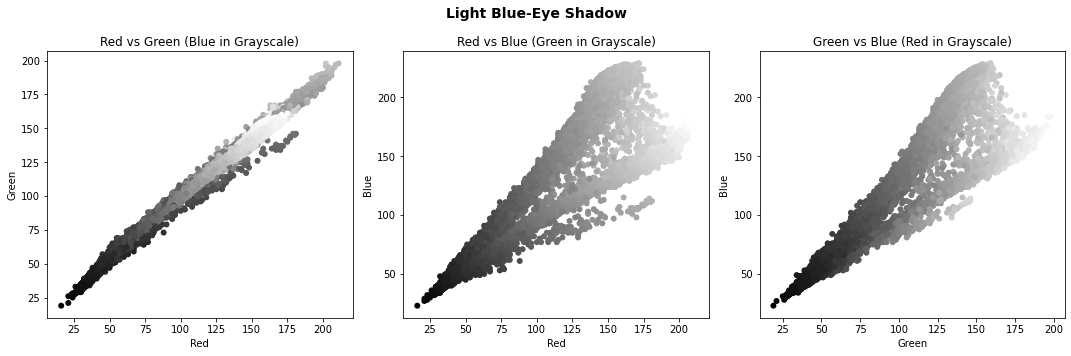

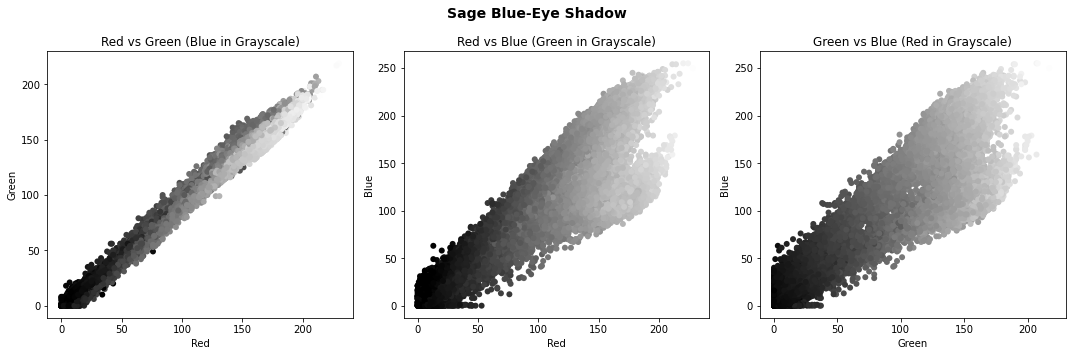

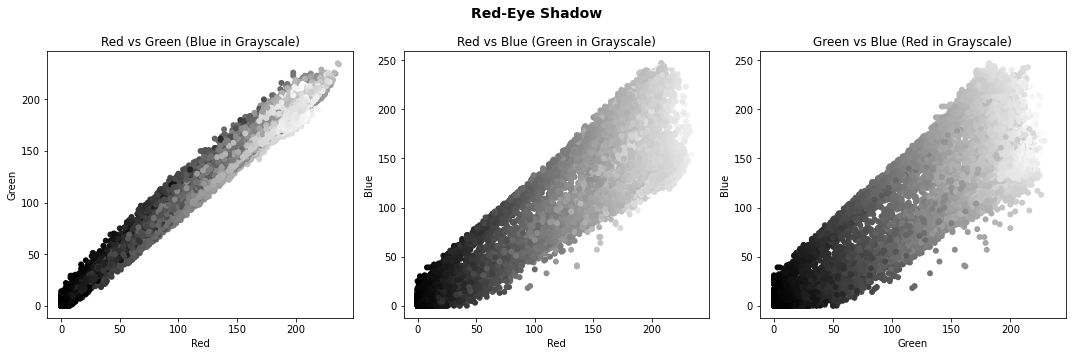

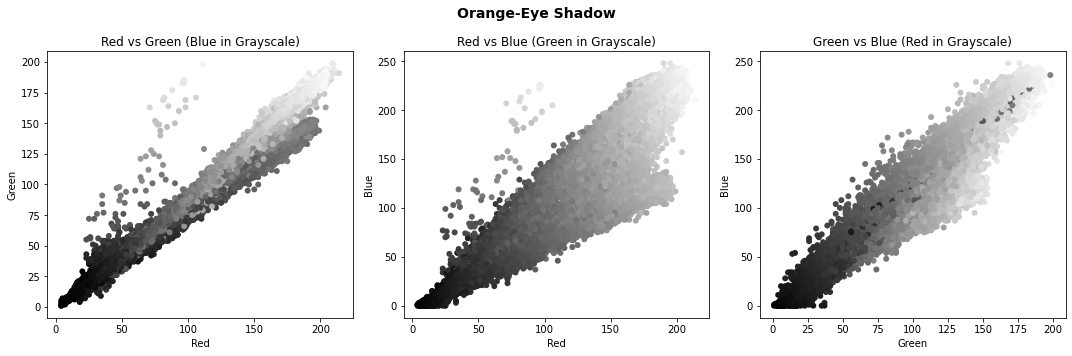

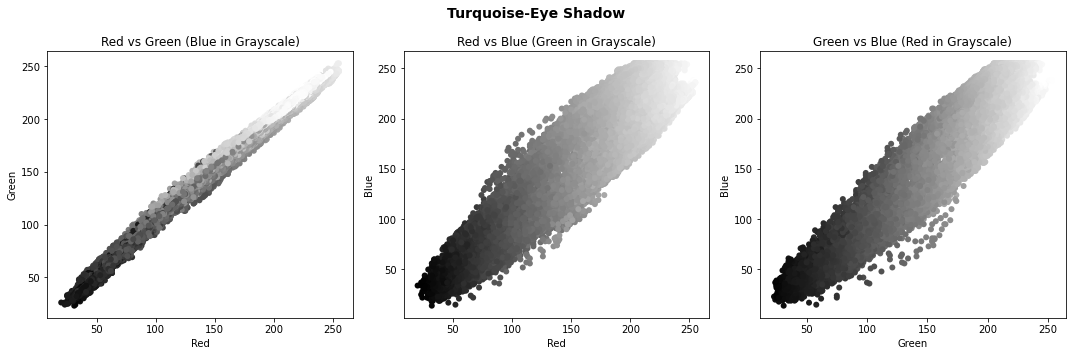

In [31]:
# eye rgb pixel analysis
for eye, imageName in zip(eye_area,image_name):
    # Visualize the RGB space of the ROIs
    plot_rgb_space(eye,imageName,'Eye Shadow')


In [18]:
# lip rgb pixel analysis
lip_area=[]
for image in image_url:
    # Read image
    im = cv2.imread(image)
    
    # Select ROI
    r = cv2.selectROI(im)

    # Crop image
    imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    lip_area.append(imCrop)


for lip in lip_area:
    print(lip.shape)

(121, 221, 3)
(123, 216, 3)
(131, 221, 3)
(122, 201, 3)
(124, 208, 3)


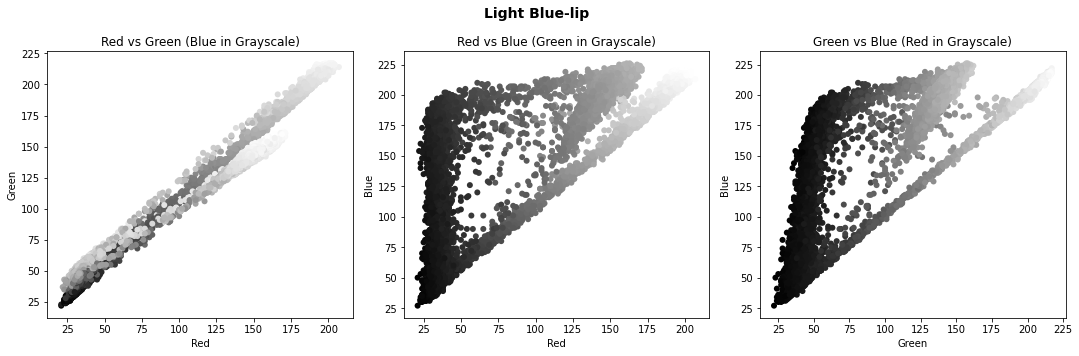

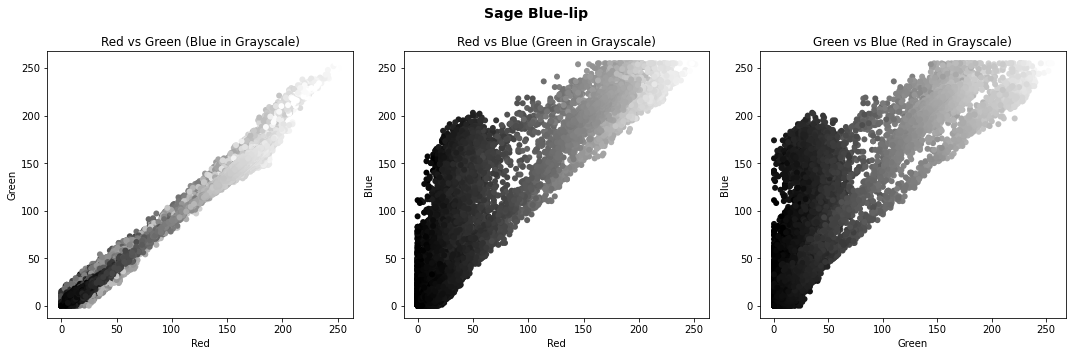

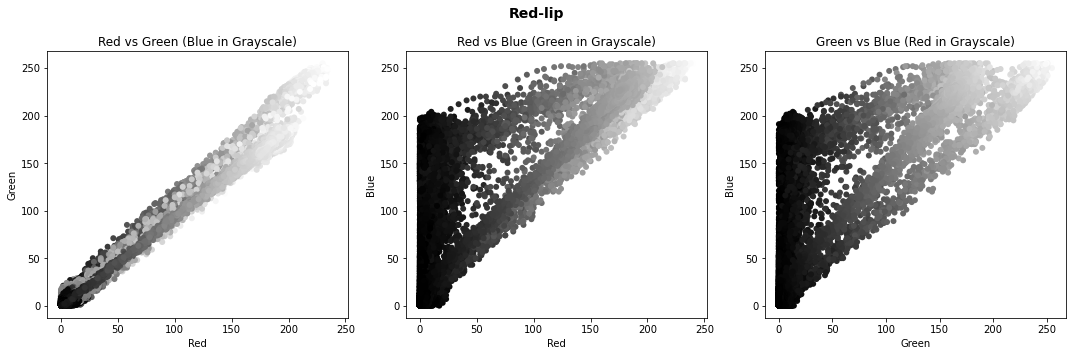

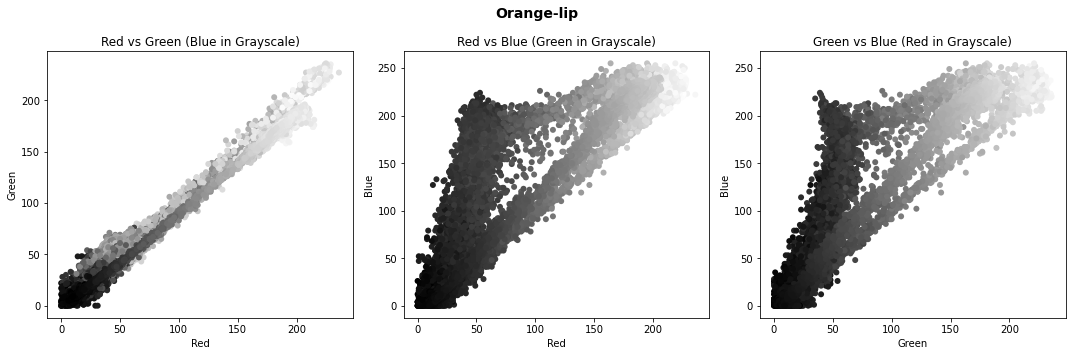

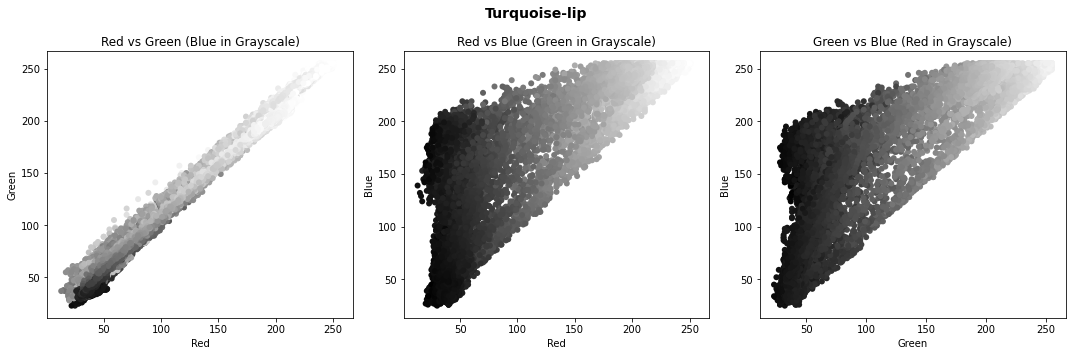

In [20]:
for lip, imageName in zip(lip_area,image_name):
    # Visualize the RGB space of the ROIs
    plot_rgb_space(lip,imageName,'lip')
